In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# target gene list

In [7]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/TargetGenes/within_10kb')

target_gene_dict = {}

for process in ['Universal', 
              'UniversalComplement',
              'EarlyEmbryogenesisComplement', # 
              'PGCsDevelopmentComplement', # 
              'SpermatogenesisComplement', # 
              'RetinalDevelopmentComplement',
              'HeartDevelopmentComplement', #
              'LiverDevelopmentComplement', 
              ] :
    target_gene_dict[process] = pd.read_csv('{}CHM.targetGenes_RefSeq.txt'.format(process), sep='\t', header=None, names=['transcript_id'])['transcript_id'].tolist()
    
target_gene_dict

{'Universal': ['NM_001001332',
  'NM_001004159',
  'NM_001004194',
  'NM_001005524',
  'NM_001005788',
  'NM_001007461',
  'NM_001007589',
  'NM_001011527',
  'NM_001011752',
  'NM_001011823',
  'NM_001011829',
  'NM_001011850',
  'NM_001011858',
  'NM_001012265',
  'NM_001012305',
  'NM_001012363',
  'NM_001012640',
  'NM_001013804',
  'NM_001014974',
  'NM_001024918',
  'NM_001033205',
  'NM_001033246',
  'NM_001033269',
  'NM_001033550',
  'NM_001033813',
  'NM_001034037',
  'NM_001034868',
  'NM_001034909',
  'NM_001035226',
  'NM_001037294',
  'NM_001037745',
  'NM_001037822',
  'NM_001039244',
  'NM_001039390',
  'NM_001039391',
  'NM_001039493',
  'NM_001039683',
  'NM_001045544',
  'NM_001080126',
  'NM_001080930',
  'NM_001081091',
  'NM_001081112',
  'NM_001081246',
  'NM_001081326',
  'NM_001085419',
  'NM_001085495',
  'NM_001097979',
  'NM_001100181',
  'NM_001101430',
  'NM_001101461',
  'NM_001101519',
  'NM_001102414',
  'NM_001102415',
  'NM_001104579',
  'NM_001104622

# query

In [9]:
query = target_gene_dict

In [12]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
GO_output = gp.profile(
    organism='mmusculus',
    # sources=['GO:CC','GO:MF','GO:BP'],
    sources=['GO:BP'],
    query=query,
    all_results=True,
    no_evidences=False,
)

In [13]:
GO_output['enrichment'] = GO_output['intersection_size'] / GO_output['query_size'] / (GO_output['term_size'] / GO_output['effective_domain_size'])
GO_output['-log10 P-value'] = -np.log10(GO_output['p_value'])
GO_output.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,enrichment,-log10 P-value
0,GO:BP,GO:0007606,sensory perception of chemical stimulus,1.413030e-46,True,"""The series of events required for an organism...",1509,603,141,27205,0.233831,0.093439,RetinalDevelopmentComplement,[GO:0007600],"[NM_001001451, NM_001001807, NM_001011527, NM_...","[[ISO, IBA, NAS, IEA], [ISA, IEA], [ISA, IEA],...",4.215618,45.849849
1,GO:BP,GO:0007186,G protein-coupled receptor signaling pathway,1.967630e-41,True,"""The series of molecular signals initiated by ...",2352,603,169,27205,0.280265,0.071854,RetinalDevelopmentComplement,[GO:0007165],"[NM_001001451, NM_001001807, NM_001011527, NM_...","[[IEA], [ISA, IEA], [ISA, IEA], [ISA, IEA], [I...",3.241760,40.706056
2,GO:BP,GO:0007606,sensory perception of chemical stimulus,2.466894e-41,True,"""The series of events required for an organism...",1509,2150,283,27205,0.131628,0.187541,UniversalComplement,[GO:0007600],"[NM_001001451, NM_001001807, NM_001011517, NM_...","[[ISO, IBA, NAS, IEA], [ISA, IEA], [ISA, IEA],...",2.373053,40.607850
3,GO:BP,GO:0007186,G protein-coupled receptor signaling pathway,9.078633e-40,True,"""The series of molecular signals initiated by ...",2352,2150,377,27205,0.175349,0.160289,UniversalComplement,[GO:0007165],"[NM_001001451, NM_001001807, NM_001004177, NM_...","[[IEA], [ISA, IEA], [IEA], [IBA, IEA], [ISA, I...",2.028216,39.041980
4,GO:BP,GO:0007606,sensory perception of chemical stimulus,1.706123e-38,True,"""The series of events required for an organism...",1509,1892,255,27205,0.134778,0.168986,PGCsDevelopmentComplement,[GO:0007600],"[NM_001001451, NM_001011517, NM_001011527, NM_...","[[ISO, IBA, NAS, IEA], [ISA, IEA], [ISA, IEA],...",2.429845,37.767990


In [15]:
GO_output.to_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/TargetGenes/within_10kb/GO_enrichment.tsv', 
    index=False, sep = '\t')

In [17]:
GO_output.loc[(GO_output['term_size'] > 15) & (GO_output['term_size'] < 50)].shape

(13671, 18)

In [18]:
def linked(gene_list1, gene_list2, threshold=0.7):
    return True if len(set(gene_list1) & set(gene_list2)) / len(
        set(gene_list1) | set(gene_list2)) > threshold else False


def term_merge(GO_results,
               query_name,
               index,
               selected_term_index,
               threshold={
                   'merge': 0.6,
                   'term_size': (15, 500),
                   'p_value': 0.001
               }):
    current_selected_term_index = set([index])
    current_index = [index]
    next_index = []
    _round = 0
    while current_index:
        _round += 1
#         print(f'round: {_round}, term size: {len(current_selected_term_index)}, next index: {current_index}')
        for i in GO_results.index:
            if i in selected_term_index or i in current_selected_term_index or GO_results.loc[
                    i, 'query'] != query_name or GO_results.loc[
                        i, 'term_size'] < threshold['term_size'][
                            0] or GO_results.loc[i, 'term_size'] > threshold[
                                'term_size'][1]:
                continue
            if linked(GO_results.loc[index, 'intersections'],
                      GO_results.loc[i, 'intersections'],
                      threshold=threshold['merge']):
                current_selected_term_index.add(i)
                next_index.append(i)
        current_index, next_index = next_index[:], []
    return current_selected_term_index


def single_query_cluster_gen(GO_results,
                             query_name,
                             threshold={
                                 'merge': 0.6,
                                 'term_size': (15, 500),
                                 'p_value': 0.001
                             }):
    '''
    return: gen(DataFrame)
    '''
    filteres = [
        True if x < threshold['p_value'] and y == query_name
        and threshold['term_size'][0] <= z <= threshold['term_size'][1] else
        False for x, y, z in zip(
            GO_results['p_value'],
            GO_results['query'],
            GO_results['term_size']
        )
    ]
    filtered_terms = GO_results.loc[filteres, :].sort_values(by='enrichment',
                                                             ascending=False)
    cluster = pd.DataFrame(columns=GO_results.columns)
    selected_term_index = set()
    current_selected_term_index = set()
    for index in filtered_terms.index:
        if index in selected_term_index:
            continue
        current_selected_term_index = term_merge(GO_results, query_name, index,
                                                 selected_term_index,
                                                 threshold)
        yield GO_results.iloc[list(current_selected_term_index
                                   ), :].sort_values(by='enrichment',
                                                     ascending=False)
        selected_term_index = selected_term_index | current_selected_term_index
        current_selected_term_index = set()

In [31]:
def query_cluster(GO_results, query, natives):
    for query_name in query.keys():
        try :
            index, row = next(GO_results.loc[[
                True if x in natives and y == query_name else False
                for x, y in zip(GO_results['native'], GO_results['query'])
            ], ['-log10 P-value', 'enrichment']].sort_values(
                by='enrichment', ascending=False).head(1).iterrows())
        except StopIteration :
            continue
        yield query_name, row['-log10 P-value'], row['enrichment']


def gen_top_K_cluster(GO_results,
                      query,
                      K=3,
                      threshold={
                          'merge': 0.6,
                          'term_size': (15, 500),
                          'p_value': 0.001
                      }):
    import csv
    import numpy as np
    from collections import defaultdict
    query_name_list = list(query.keys())
    GO_cluster = {
        query_name: {
            'term_id': [],
            '-log10 P-value': [],
            'enrichment score': [],
            'name': [],
        }
        for query_name in query_name_list
    }
    for index, query_name in enumerate(query_name_list):
        with open(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/GO/GO_{query_name}_top{K}_cluster.csv', 'w') as fhd:
            f_csv = csv.writer(fhd)
            f_csv.writerow([
                'source', 'native', 'name', '-log10 p-value',
                'enrichment score', 'intersection genes', 'term size',
                'quer size', 'intersection size', 'effective domain size'
            ])
            go_results_cluster_gen = single_query_cluster_gen(
                GO_results, query_name, threshold)
            for i in range(K):
                try:
                    cluster = next(go_results_cluster_gen)
                except StopIteration:
                    break
                    
                if cluster.shape[0] == 0:
                    break
                    
                f_csv.writerow(['#', '-----', f'cluster {i+1}'] +
                               ['-----'] * 7)
                go_term_name = ''
                count = 0
                for _, row in cluster.iterrows():
                    count += 1
                    f_csv.writerow([
                        row['source'], row['native'], row['name'],
                        -np.log10(row['p_value']), row['enrichment'],
                        ','.join(row['intersections']), row['term_size'],
                        row['query_size'], row['intersection_size'],
                        row['effective_domain_size']
                    ])
                    if count == 1:
                        go_term_name = row['name']
                        
                term_ids = list(cluster['native'])
                for row in query_cluster(GO_results, query, term_ids):
                    GO_cluster[row[0]]['term_id'].append(set(term_ids))
                    GO_cluster[row[0]]['-log10 P-value'].append(row[1])
                    GO_cluster[row[0]]['enrichment score'].append(row[2])
                    GO_cluster[row[0]]['name'].append(go_term_name)
    
    merge_cluster = []
    indexes_to_be_merged = set(
        range(len(GO_cluster[query_name_list[0]]['term_id'])))
    ###BFS
    # get edges
    edges = defaultdict(list)
    for i in range(len(indexes_to_be_merged)):
        for j in range(i + 1, len(indexes_to_be_merged)):
            if len(GO_cluster[query_name_list[0]]['term_id'][i]
                   & GO_cluster[query_name_list[0]]['term_id'][j]) > 0:
                edges[i].append(j)
                edges[j].append(i)
    # merge
    merged_indexex = set()
    while len(indexes_to_be_merged - merged_indexex) > 0:
        merge_cluster.append([])
        current_index = [list(indexes_to_be_merged - merged_indexex)[0]]
        merged_indexex.add(current_index[0])
        while current_index:
            merge_cluster[-1].extend(current_index)
            next_index = []
            for index in current_index:
                for next_node in edges[index]:
                    if next_node in merged_indexex:
                        continue
                        
                    next_index.append(next_node)
                    merged_indexex.add(next_node)
                    
            current_index = next_index[:]
            
    print(merge_cluster)
    for mc in merge_cluster:
        for query_name in query_name_list:
            if max(mc) < len(GO_cluster[query_name]['enrichment score']) :
                target_index = mc[np.array([
                    GO_cluster[query_name]['enrichment score'][i] for i in mc
                ]).argmax()]
                yield GO_cluster[query_name]['name'][mc[0]], GO_cluster[
                    query_name]['-log10 P-value'][target_index], GO_cluster[
                        query_name]['enrichment score'][target_index], query_name
            else :
                continue

GO_cluster = pd.DataFrame(
    gen_top_K_cluster(GO_output,
                      query,
                      K=3,
                      threshold={
                          'merge': 0.6,
                          'term_size': (15, 1000),
                          'p_value': 0.05
                      }),
    columns=['name', '-log10 P-value', 'enrichment score', 'sample'])
GO_cluster.head()

[[0], [1], [2, 4, 7, 10, 17, 19, 21], [3, 6, 9, 12, 18, 20], [5, 11], [8, 13, 22], [16], [14], [15]]


,name,-log10 P-value,enrichment score,sample
0,protein localization to CENP-A containing chro...,1.499932,15.480255,Universal
1,protein localization to CENP-A containing chro...,-0.000000,0.702972,UniversalComplement
2,protein localization to CENP-A containing chro...,-0.000000,0.719709,EarlyEmbryogenesisComplement
3,protein localization to CENP-A containing chro...,-0.000000,0.599124,PGCsDevelopmentComplement
4,protein localization to CENP-A containing chro...,-0.000000,1.081108,SpermatogenesisComplement


In [42]:
GO_cluster['sample'].head(10)

0                       Universal
1             UniversalComplement
2    EarlyEmbryogenesisComplement
3       PGCsDevelopmentComplement
4       SpermatogenesisComplement
5    RetinalDevelopmentComplement
6      HeartDevelopmentComplement
7      LiverDevelopmentComplement
8                       Universal
9             UniversalComplement
Name: sample, dtype: object

In [43]:
sample_order = []
for sample in GO_cluster['sample'] :
    if sample == 'Universal' :
        sample_order.append(1)
    elif sample == 'UniversalComplement' :
        sample_order.append(2)
    elif sample == 'EarlyEmbryogenesisComplement' :
        sample_order.append(3)
    elif sample == 'PGCsDevelopmentComplement' :
        sample_order.append(4)
    elif sample == 'SpermatogenesisComplement' :
        sample_order.append(5)
    elif sample == 'RetinalDevelopmentComplement' :
        sample_order.append(6)
    elif sample == 'HeartDevelopmentComplement' :
        sample_order.append(7)
    elif sample == 'LiverDevelopmentComplement' :
        sample_order.append(8)
        
        
GO_cluster['sample_order'] = sample_order
# GO_cluster.sort_values(by=['sample_order', 'enrichment score'],ascending=True,inplace=True)

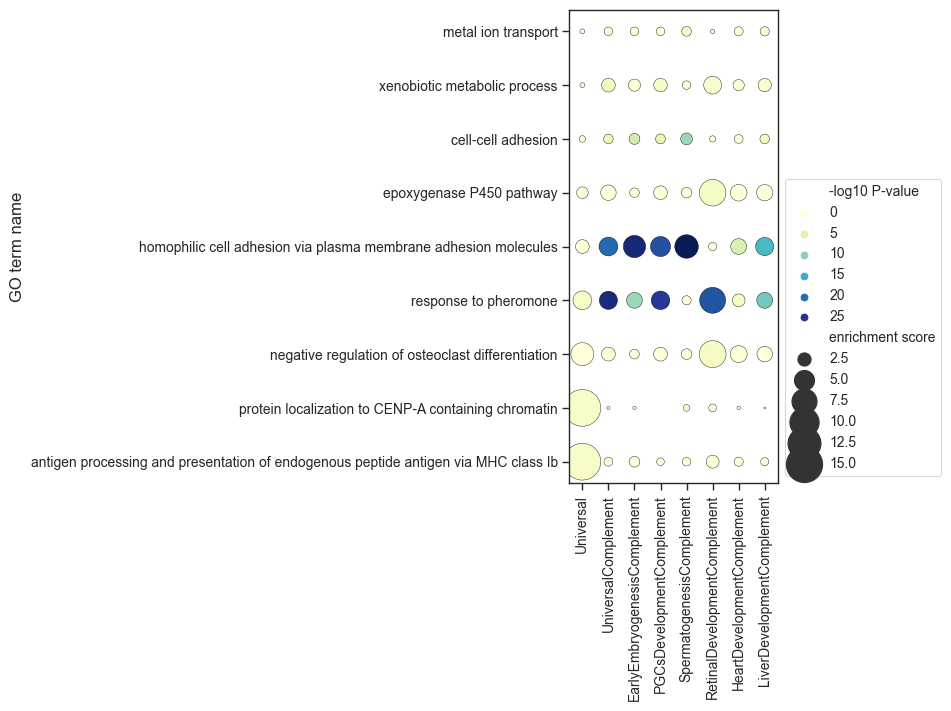

In [52]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):

    fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))
    sns.scatterplot(
        x='sample_order',
        y='name',
        size='enrichment score',
        hue='-log10 P-value',
        data=GO_cluster,
        palette='YlGnBu',
        sizes=(0, 700),
        edgecolor='k',
        ax=ax,
    )
    ax.legend(bbox_to_anchor=(1, 0), loc='lower left')
    ax.set_xlim(0.5, 8.5)
    ax.set_xticks(range(1,9))
    ax.set_yticks(ax.get_yticks())
    ax.set_xticklabels(['Universal', 
              'UniversalComplement',
              'EarlyEmbryogenesisComplement', # 
              'PGCsDevelopmentComplement', # 
              'SpermatogenesisComplement', # 
              'RetinalDevelopmentComplement',
              'HeartDevelopmentComplement', #
              'LiverDevelopmentComplement', 
              ], rotation=90)
    ax.set_ylabel('GO term name')
    ax.set_xlabel('')
    fig.tight_layout()
    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make11_Scatterplot_GO_results_universalProcessComplement.pdf', transparent=True)

In [39]:
ax.get_yticklabels()

[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, ''),
 Text(0, 7, ''),
 Text(0, 8, '')]